In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from decision_tree import DecisionTree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import load_diabetes, load_digits

## Classification

In [2]:
# Load Dataset
X_digits, y_digits = load_digits(return_X_y=True)
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_digits, y_digits, test_size=0.3, random_state=42)

accuracy (custom): 0.8389
accuracy (sklearn): 0.8426


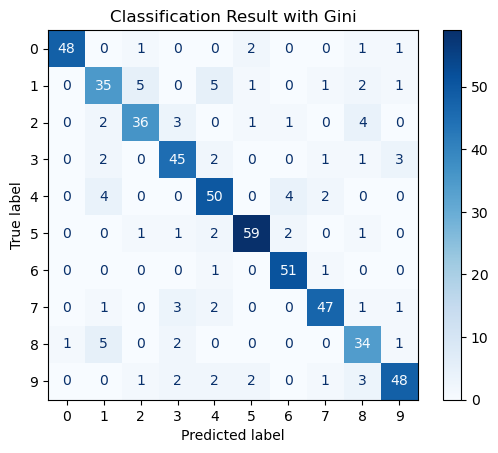

In [3]:
# Using Gini as criterion
decision_tree_gini = DecisionTree(task="classification", criterion="gini")
decision_tree_gini.fit(X_train_cls, y_train_cls)
y_hat_gini = decision_tree_gini.predict(X_test_cls)
acc_gini = decision_tree_gini.score(X_test_cls, y_test_cls)
print(f"accuracy (custom): {acc_gini:.4f}")

decision_tree_gini_skl = DecisionTreeClassifier(criterion="gini")
decision_tree_gini_skl.fit(X_train_cls, y_train_cls)
y_hat_gini_skl = decision_tree_gini_skl.predict(X_test_cls)
acc_gini_skl = accuracy_score(y_test_cls, y_hat_gini_skl)
print(f"accuracy (sklearn): {acc_gini_skl:.4f}")

cm_gini = confusion_matrix(y_test_cls, y_hat_gini)
ConfusionMatrixDisplay(confusion_matrix=cm_gini).plot(cmap="Blues")
plt.title("Classification Result with Gini")
plt.show()

accuracy (custom): 0.8685
accuracy (sklearn): 0.8870


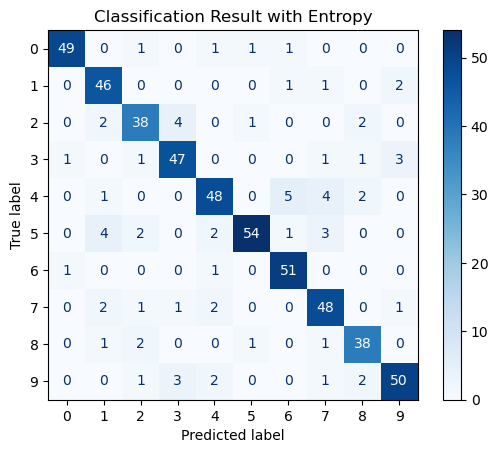

In [4]:
# Using Entropy as criterion
decision_tree_ent = DecisionTree(task="classification", criterion="entropy")
decision_tree_ent.fit(X_train_cls, y_train_cls)
y_hat_ent = decision_tree_ent.predict(X_test_cls)
acc_ent = decision_tree_ent.score(X_test_cls, y_test_cls)
print(f"accuracy (custom): {acc_ent:.4f}")

decision_tree_ent_skl = DecisionTreeClassifier(criterion="entropy")
decision_tree_ent_skl.fit(X_train_cls, y_train_cls)
y_hat_ent_skl = decision_tree_ent_skl.predict(X_test_cls)
acc_ent_skl = accuracy_score(y_test_cls, y_hat_ent_skl)
print(f"accuracy (sklearn): {acc_ent_skl:.4f}")

cm_ent = confusion_matrix(y_test_cls, y_hat_ent)
ConfusionMatrixDisplay(confusion_matrix=cm_ent).plot(cmap="Blues")
plt.title("Classification Result with Entropy")
plt.show()

## Regression

In [5]:
# Load Dataset
X_diabetes, y_diabetes = load_diabetes(return_X_y=True)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_diabetes, y_diabetes, test_size=0.3, random_state=42)

accuracy (custom): 5495.9699
accuracy (sklearn): 5675.7519


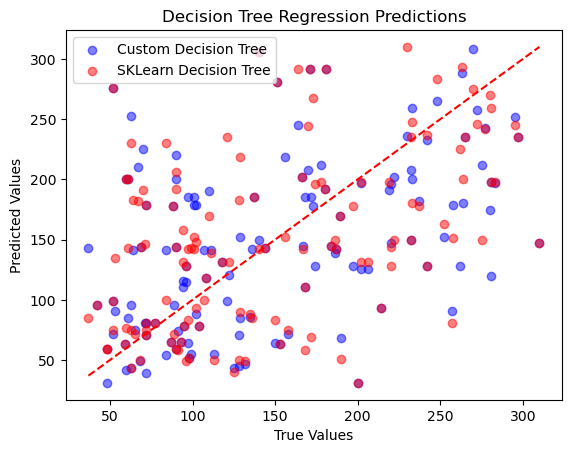

In [6]:
decision_tree_mse = DecisionTree(task="regression", criterion="mse")
decision_tree_mse.fit(X_train_reg, y_train_reg)
y_hat_mse = decision_tree_mse.predict(X_test_reg)
acc_mse = decision_tree_mse.score(X_test_reg, y_test_reg)
print(f"accuracy (custom): {acc_mse:.4f}")

decision_tree_reg_skl = DecisionTreeRegressor()
decision_tree_reg_skl.fit(X_train_reg, y_train_reg)
y_hat_reg_skl = decision_tree_reg_skl.predict(X_test_reg)
acc_reg_skl = mean_squared_error(y_test_reg, y_hat_reg_skl)
print(f"accuracy (sklearn): {acc_reg_skl:.4f}")

plt.scatter(y_test_reg, y_hat_mse, label="Custom Decision Tree", alpha=0.5, c="blue")
plt.scatter(y_test_reg, y_hat_reg_skl, label="SKLearn Decision Tree", alpha=0.5, c="red")
plt.plot([min(y_test_reg), max(y_test_reg)], [min(y_test_reg), max(y_test_reg)], 'r--')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.title("Decision Tree Regression Predictions")
plt.show()